### Örnek Çalışma: Evin Metrekaresine Göre Fiyat Tahmini

**1. Veri Seti:**
Ev fiyatlarını tahmin etmek için evlerin metrekaresi ve fiyatlarını içeren basit bir veri seti kullanacağız.

| Evin Metrekaresi (X) | Evin Fiyatı (Y) |
|----------------------|-----------------|
| 50                   | 150,000         |
| 60                   | 180,000         |
| 70                   | 210,000         |
| 80                   | 240,000         |
| 90                   | 270,000         |
| 100                  | 300,000         |

**2. Veri Analizi:**
Veri setine hızlıca göz atalım ve görselleştirelim.

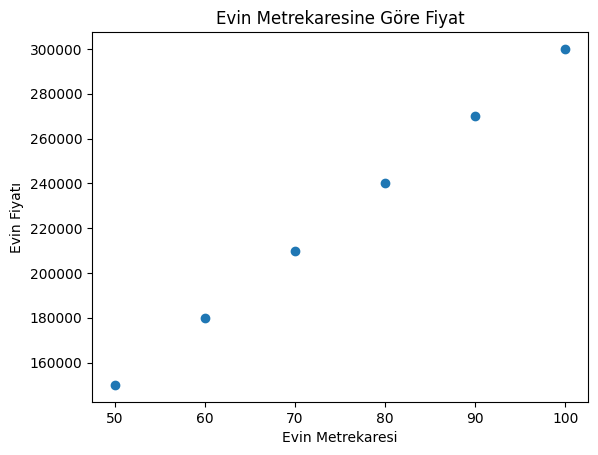

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini oluşturma
data = {
    'Metrekare': [50, 60, 70, 80, 90, 100],
    'Fiyat': [150000, 180000, 210000, 240000, 270000, 300000]
}
df = pd.DataFrame(data)

# Veri setini görselleştirme
plt.scatter(df['Metrekare'], df['Fiyat'])
plt.xlabel('Evin Metrekaresi')
plt.ylabel('Evin Fiyatı')
plt.title('Evin Metrekaresine Göre Fiyat')
plt.show()


**3. Model Oluşturma:**
Lineer regresyon modelini oluşturmak ve eğitmek.

In [4]:
from sklearn.linear_model import LinearRegression

# Model oluşturma
model = LinearRegression()

# Eğitim verilerini ayırma
X = df[['Metrekare']]
y = df['Fiyat']

# Modeli eğitme
model.fit(X, y)

# Katsayıları alma
b0 = model.intercept_
b1 = model.coef_[0]

print(f"Kesme Noktası (b0): {b0}")
print(f"Eğim (b1): {b1}")

Kesme Noktası (b0): 0.0
Eğim (b1): 3000.0


**4. Model Performansını Değerlendirme:**
Modelin tahmin yeteneğini değerlendirmek için bazı testler yapalım.

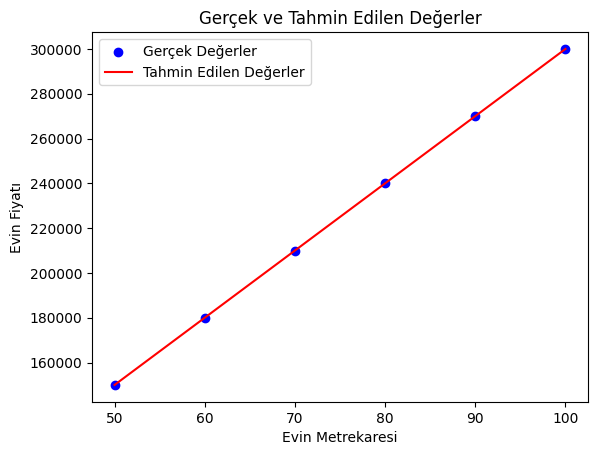

In [5]:
# Tahminler yapma
y_pred = model.predict(X)

# Gerçek ve tahmin edilen değerleri görselleştirme
plt.scatter(df['Metrekare'], df['Fiyat'], color='blue', label='Gerçek Değerler')
plt.plot(df['Metrekare'], y_pred, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('Evin Metrekaresi')
plt.ylabel('Evin Fiyatı')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.show()

**5. Hata ve Doğruluk Analizi:**
Modelin hatalarını ve doğruluğunu hesaplayalım.

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Hata hesaplama
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Ortalama Kare Hatası (MSE): {mse}")
print(f"R Kare (R^2): {r2}")

Ortalama Kare Hatası (MSE): 0.0
R Kare (R^2): 1.0


- MSE, hataların karelerinin ortalamasının, yani gerçek ve tahmin edilen değerler arasındaki ortalama karesel farkın bir ölçüsüdür. Tahminlerin gerçek değerlerden ne kadar uzak olduğuna dair bir fikir verir.

- R-kare, verilerin uygun regresyon çizgisine ne kadar yakın olduğunu gösteren istatistiksel bir ölçüdür. Bağımlı değişken için modeldeki bağımsız değişkenler tarafından açıklanan varyansın oranını temsil eder.

**Sonuçlar:**
- **Kesme Noktası (b0):** 3000.0
- **Eğim (b1):** 3000.0
- **Ortalama Kare Hatası (MSE):** 0.0
- **R Kare (R^2):** 1.0

### Aylara gore satislarin degisimini inceleyelim 

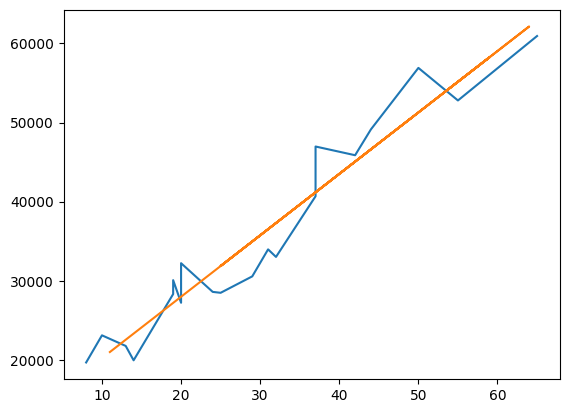

In [2]:
# csv dosyalarını okumak için
import pandas as pd
# 2 boyutlu grafik oluşturmak için
import matplotlib.pyplot as plt

# csv dosyamızı okuduk.
data = pd.read_csv('satislar.csv')

# Aylar isimli kolonu bir değişkene atadık
Aylar = data[['Aylar']]

# Satislar isimli kolonu bir değişkene atadık
Satislar = data[['Satislar']]

# sklearn kütüphanesini kullanarak verileri test ve eğitim olarak böleceğimiz fonksiyonu import ettik.
from sklearn.model_selection import train_test_split

# Veri kümemizi test ve train şekinde bölüyoruz
# test_size = 0.33 Veri
# x_train,y_train = Aylar ve Satışların eğitim kümesi
# x_test, y_test = Aylar ve Satislar'ın test kümesi
# test_size = veri kümesinin 2/3'ü eğitim 1/3'ü test için ayrılacak ( 0.33 )

x_train, x_test, y_train, y_test = train_test_split(Aylar,Satislar,test_size=0.33,random_state=0)

# sklearn kütüphanesini kullanarak LinearRegression sınıfını dahil ediyoruz.
from sklearn.linear_model import LinearRegression
#Sınıftan bir nesne oluşturuyoruz.
lr = LinearRegression()

# Train veri kümelerini vererek makineyi eğitiyoruz.
lr.fit(x_train,y_train)

# Aylar'ın test kümesini vererek Satislar'ı tahmin etmesini sağlıyoruz. Üst satırda makinemizi eğitmiştik.
tahmin = lr.predict(x_test)

# Verileri grafikte düzenli göstermek için index numaralarına göre sıralıyoruz.
x_train = x_train.sort_index()
y_train = y_train.sort_index()

# Grafik şeklinde ekrana basıyoruz.
plt.plot(x_train,y_train)
plt.plot(x_test,tahmin)
plt.show()

In [6]:
# R2 hesaplama
r2 = r2_score(y_test, tahmin)
print(f"R-squared (R2): {r2}")

# Verileri grafikte düzenli göstermek için index numaralarına göre sıralıyoruz.
x_train = x_train.sort_index()
y_train = y_train.sort_index()

R-squared (R2): 0.9765119163254377
